In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
trips = pd.read_csv('train.csv')

## Time Features

Convert pickup time to month, day, hour, minute, etc.

In [16]:
trips['pickup_datetime'] = pd.to_datetime(trips['pickup_datetime'], errors='coerce')

In [17]:
trips['month'] = trips['pickup_datetime'].dt.month
trips['week'] = trips['pickup_datetime'].dt.week
trips['day'] = trips['pickup_datetime'].dt.day
trips['hour'] = trips['pickup_datetime'].dt.hour
trips['minute'] = trips['pickup_datetime'].dt.minute

In [19]:
trips.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,week,day,hour,minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,11,14,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,23,12,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,3,19,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,14,6,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,12,26,13,30


## Spatial features

We assume that the area of New York is small enough that we ignore the curvature of the Earth and so we can take longitude and latitude as coordinates. The SW corner of Central Park is at (-73.981920,40.768078) and the NW corner is at (-73.958166,40.800572). The angle between due North and the avenues is then:

In [20]:
x1 = np.radians(-73.981920)
y1 = np.radians(40.768078)
x2 = np.radians(-73.958166)
y2 = np.radians(40.800572)
theta = np.arctan2(x2 - x1, y2 - y1)

In [21]:
theta*180/np.pi

36.167821891669846

In [22]:
trips['x1'] = np.cos(theta) * (np.radians(trips['pickup_longitude']) - x1) - np.sin(theta) * (np.radians(trips['pickup_latitude']) - y1)
trips['y1'] = np.sin(theta) * (np.radians(trips['pickup_longitude']) - x1) + np.cos(theta) * (np.radians(trips['pickup_latitude']) - y1)
trips['x2'] = np.cos(theta) * (np.radians(trips['dropoff_longitude']) - x1) - np.sin(theta) * (np.radians(trips['dropoff_latitude']) - y1)
trips['y2'] = np.sin(theta) * (np.radians(trips['dropoff_longitude']) - x1) + np.cos(theta) * (np.radians(trips['dropoff_latitude']) - y1)

Multiplying the coordinates by the radius of the Earth (6371 km) transforms our coordinates into kilometers from the SW corner of Central Park.

In [23]:
trips[['x1','y1','x2','y2']] = 6371*trips[['x1','y1','x2','y2']]

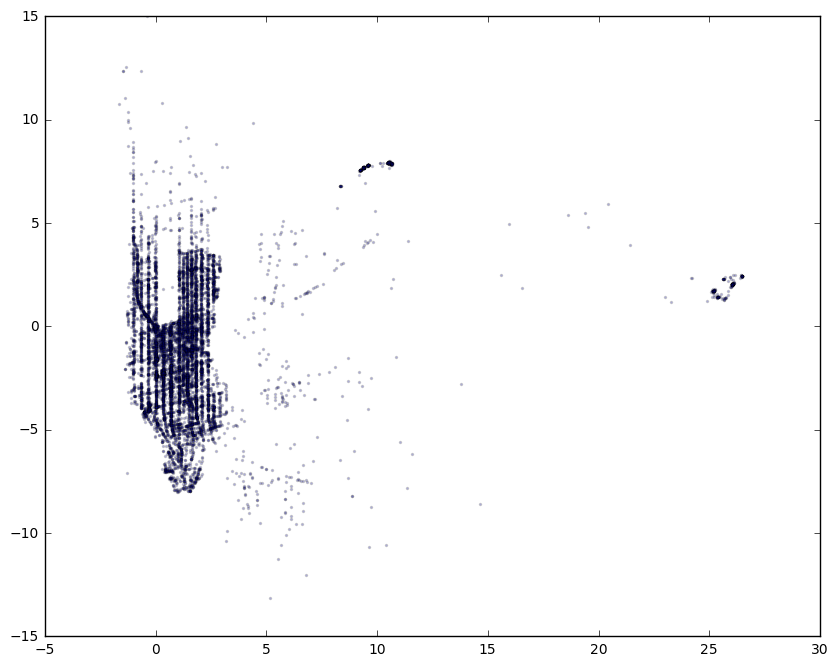

In [24]:
sample = trips.sample(10000)
plt.figure(figsize=(10,8))
plt.scatter(x=sample['x1'],y=sample['y1'],s=2,alpha=0.2)
plt.xlim([-5,30]), plt.ylim([-15,15]);